## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [25]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
n = len(df)
n

130

In [6]:
df.head(3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


In [17]:
mean = df['temperature'].mean()
sd = df['temperature'].std()
print mean
print sd

98.2492307692
0.733183158039


## 1. Is the distribution of body temperatures normal?

/Users/dhara/miniconda2/envs/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


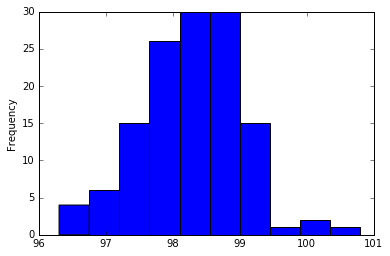

In [49]:
%matplotlib inline
df.temperature.plot(kind="hist");

In [14]:
a = len(df[(df.temperature > (mean-sd)) & (df.temperature < (mean+sd)) ])
percent_1_sd = (float(a)/n)*100
percent_1_sd

69.23076923076923

In [15]:
b = len(df[(df.temperature > (mean-(2*sd))) & (df.temperature < (mean+(2*sd))) ])
percent_2_sd = (float(b)/n)*100
percent_2_sd

94.61538461538461

In [16]:
c = len(df[(df.temperature > (mean-(3*sd))) & (df.temperature < (mean+(3*sd))) ])
percent_3_sd = (float(c)/n)*100
percent_3_sd

99.23076923076923

It is a normal distribution

All normal density curves satisfy the following property which is often referred to as the Empirical Rule.

68%
of the observations fall within 1 standard deviation of the mean

95%
of the observations fall within 2 standard deviations of the mean

99.7%
of the observations fall within 3 standard deviations of the mean

As can be seen from the calculations above, the Enpirical Rule holds tru for the sample. Hence, it is a normal distribution.

## 2. Is the true population mean really 98.6 degrees F?

H0: p = 98.6

H1: p = 98.2F

Assume H0 is true. 

Probability that the sample mean 98.2 is less than 1% then we reject H0. 

Since sample size (=130) is greater than 30, we will use z-statistic

In [47]:
import math

sample_mean = mean
h0_mean = 98.6
z_stat = (sample_mean-h0_mean)/(sd/math.sqrt(n))
print z_stat

-0.478419651247


In [48]:
import scipy 
from scipy.stats import norm

p_value = scipy.stats.norm.sf(abs(z_stat)) #one-sided
print p_value

0.316175774831


Since p-value is less than 0.32 (32%), which is greater than the 5% margin of error, we accept the null hypothesis.

Hence, the population mean is really 98.6F

## 3. At what temperature should we consider someone's temperature to be "abnormal"?

In [45]:
# Assuming 95% Confidence Interval find the critical z-value
z_critical = stats.norm.ppf(q = 0.95)
print("z-critical value:")              # Check the z-critical value
print(z_critical)

margin_of_error = z_critical * (sd)
print("margin of error:")
print(margin_of_error*100)

confidence_interval = (mean - margin_of_error,
                       mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)
        
print("abnormal values:")
df[(df.temperature<(mean - margin_of_error)) | (df.temperature>(mean+margin_of_error))]

z-critical value:
1.64485362695
margin of error:
120.597897672
Confidence interval:
(97.043251792510659, 99.455209745950839)
abnormal values:


,temperature,gender,heart_rate
11,96.7,F,62.0
35,99.5,M,75.0
39,96.4,F,69.0
42,96.9,M,74.0
91,100.0,F,78.0
95,96.8,F,75.0
96,99.9,F,79.0
105,96.7,M,71.0
106,97.0,M,80.0
116,100.8,F,77.0


## 4. Is there a significant difference between males and females in normal temperature?

In [57]:
mean_male = df[df.gender == 'M'].temperature.mean()
mean_female = df[df.gender == 'F'].temperature.mean()
std_male = df[df.gender == 'M'].temperature.std()
std_female = df[df.gender == 'F'].temperature.std()

n1 = len(df[df.gender == 'M'])
n2 = len(df[df.gender == 'F'])

mean_diff = mean_female - mean_male
print("mean difference:")
print(mean_diff)

std_diff = math.sqrt((std_female*std_female/n2) + (std_male*std_male/n1))
print("std difference:")
print(std_diff)

mean difference:
0.289230769231
std difference:
0.12655395042


H0: NO SIGNIFICANT DIFFERENCE BETWEEN MALES AND FEMALES TEMPERATURE

H1: THERE IS A SIGNIFICANT DIFFERENCE

Assume H0 is true. 

Confidence Interval: 95%

If probability that mean difference = 0.2893 is below 5%, we will reject H0.

In [60]:
critical_diff = z_critical*std_diff
print("5% chance that difference in males and females temperature is grreater than:")
print critical_diff

if(mean_diff>critical_diff):
    print("H0 rejected. There is a significant difference")
else:
    print("H0 accepted. There is no sifnificant difference")

5% chance that difference in males and females temperature is grreater than:
0.208162724353
H0 rejected. There is a significant difference
